In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
edf = pd.read_csv('datasets/edf_stock_history.csv')
tte = pd.read_csv('datasets/tte_stock_history.csv')


In [3]:
bp = pd.read_csv('datasets/bp_historical_data.csv')

EDF is the government-owned french electric utility company responsible for supplying electricity during 2012 London Olympics and the upcoming 2024 Paris Olympics. TTE is the biggest french energy company. 

In [4]:
bp

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2015,354.00,355.00,356.35,352.61,6.94M,-0.32%
1,12/30/2015,355.15,358.00,358.00,353.90,17.52M,-1.55%
2,12/29/2015,360.75,357.15,362.85,356.85,25.25M,-1.42%
3,12/24/2015,365.95,363.90,366.30,362.95,7.16M,1.54%
4,12/23/2015,360.40,348.10,360.85,347.95,34.90M,4.48%
...,...,...,...,...,...,...,...
1765,01/08/2009,532.00,522.73,536.00,515.00,36.54M,1.58%
1766,01/07/2009,523.75,545.75,546.00,520.25,75.47M,-5.55%
1767,01/06/2009,554.50,557.27,565.00,550.00,50.29M,-0.98%
1768,01/05/2009,560.00,560.00,566.50,546.00,47.20M,1.31%


In [5]:
bp.Date = pd.to_datetime(bp.Date)
bp = bp.sort_values(by='Date')
bp = bp.rename(columns={'Price' : 'Close'})
bp.reset_index(inplace=True)

,index,Date,Close,Open,High,Low,Vol.,Change %
0,1769,2009-01-02,552.75,532.75,553.50,524.50,25.64M,5.09%
1,1768,2009-01-05,560.00,560.00,566.50,546.00,47.20M,1.31%
2,1767,2009-01-06,554.50,557.27,565.00,550.00,50.29M,-0.98%
3,1766,2009-01-07,523.75,545.75,546.00,520.25,75.47M,-5.55%
4,1765,2009-01-08,532.00,522.73,536.00,515.00,36.54M,1.58%
...,...,...,...,...,...,...,...,...
1765,4,2015-12-23,360.40,348.10,360.85,347.95,34.90M,4.48%
1766,3,2015-12-24,365.95,363.90,366.30,362.95,7.16M,1.54%
1767,2,2015-12-29,360.75,357.15,362.85,356.85,25.25M,-1.42%
1768,1,2015-12-30,355.15,358.00,358.00,353.90,17.52M,-1.55%


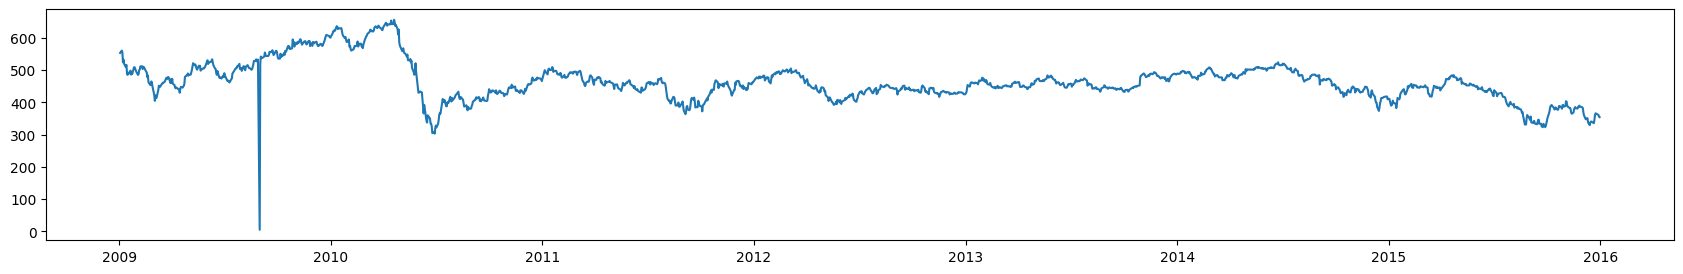

In [6]:
plt.figure(figsize=(21, 3))
plt.plot(bp.Date, bp.Close)

In [7]:
edf.Date = pd.to_datetime(edf.Date)
edf = edf.sort_values(by='Date')
edf = edf[(2009 <= edf.Date.dt.year) & (edf.Date.dt.year <= 2021)].reset_index()
edf = edf.rename(columns={'Price' : 'Close'})
edf

/var/folders/39/5w_n98y523q5v9f1rhz5n9y00000gn/T/ipykernel_16522/3435373505.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  edf.Date = pd.to_datetime(edf.Date)


,index,Date,Close,Open,High,Low,Vol.,Change %
0,3581,2009-01-02,41.95,41.50,42.24,41.01,748.45K,1.08%
1,3580,2009-01-05,43.23,42.20,43.23,42.14,1.28M,3.05%
2,3579,2009-01-06,42.84,43.24,43.44,42.53,971.01K,-0.90%
3,3578,2009-01-07,42.95,43.30,43.42,42.55,990.35K,0.26%
4,3577,2009-01-08,43.62,42.53,43.69,42.40,1.26M,1.56%
...,...,...,...,...,...,...,...,...
3324,257,2021-12-27,9.76,9.71,9.81,9.68,2.51M,0.64%
3325,256,2021-12-28,9.84,9.76,9.92,9.74,2.50M,0.88%
3326,255,2021-12-29,9.88,9.86,9.98,9.85,2.44M,0.39%
3327,254,2021-12-30,9.92,9.90,9.94,9.87,1.61M,0.44%


In [8]:
tte.Date = pd.to_datetime(tte.Date)
tte = tte[(tte.Date.dt.year <= 2021) & (tte.Date.dt.year >= 2009)].reset_index()
tte

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,2263,2009-01-02,55.930000,57.849998,55.570000,57.560001,23.116064,2133900
1,2264,2009-01-05,56.020000,57.639999,55.980000,56.570000,22.718483,3016000
2,2265,2009-01-06,56.389999,56.980000,55.470001,56.279999,22.602022,2879100
3,2266,2009-01-07,56.150002,56.200001,54.110001,54.849998,22.027731,2684800
4,2267,2009-01-08,55.340000,56.209999,54.730000,55.970001,22.477522,3531900
...,...,...,...,...,...,...,...,...
3268,5531,2021-12-27,50.669998,51.060001,50.459999,51.009998,43.459629,1149900
3269,5532,2021-12-28,51.160000,51.320000,50.939999,51.220001,43.638546,1031500
3270,5533,2021-12-29,50.779999,51.209999,50.669998,50.970001,43.425549,1472500
3271,5534,2021-12-30,50.110001,50.380001,49.970001,49.970001,43.207649,997200


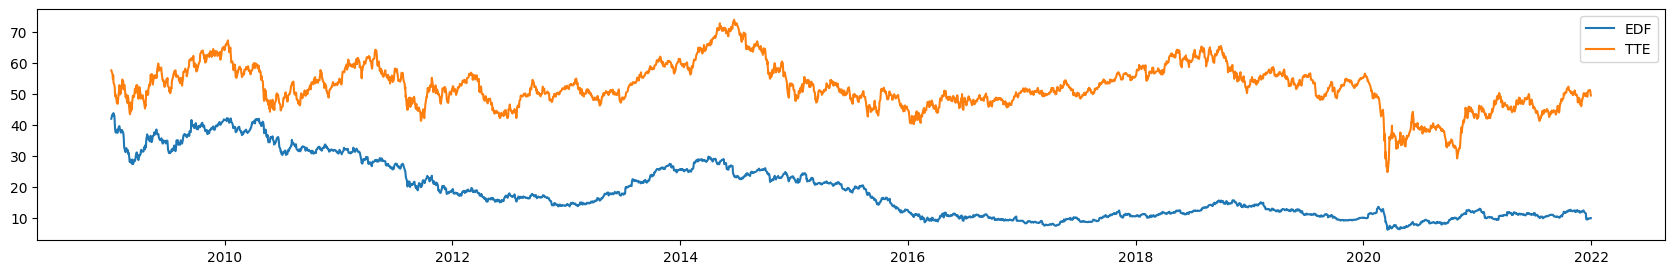

In [9]:
plt.figure(figsize=(21, 3))
stocks = {'EDF' : edf, 'TTE' : tte}
for name, df in stocks.items():
    plt.plot(df.Date, df.Close, label=name)

plt.legend()
plt.show()

In [10]:
edf['edf_pct0'] = edf.Close.pct_change().shift(-1)
tte['tte_pct0'] = tte.Close.pct_change().shift(-1)
edf = edf.rename(columns={'Close' : 'edf_close', 'Vol.' : 'edf_vol'})
tte = tte.rename(columns={'Close' : 'tte_close', 'Volume' : 'tte_vol'})

In [11]:
edf_tomerge = edf[['Date', 'edf_close', 'edf_pct0', 'edf_vol']]
tte_tomerge = tte[['Date', 'tte_close', 'tte_pct0', 'tte_vol']]
stocks = edf_tomerge.merge(tte_tomerge, on='Date')

In [12]:
stocks

,Date,edf_close,edf_pct0,edf_vol,tte_close,tte_pct0,tte_vol
0,2009-01-02,41.95,0.030513,748.45K,57.560001,-0.017199,2133900
1,2009-01-05,43.23,-0.009022,1.28M,56.570000,-0.005126,3016000
2,2009-01-06,42.84,0.002568,971.01K,56.279999,-0.025409,2879100
3,2009-01-07,42.95,0.015600,990.35K,54.849998,0.020419,2684800
4,2009-01-08,43.62,0.003210,1.26M,55.970001,-0.041629,3531900
...,...,...,...,...,...,...,...
3239,2021-12-27,9.76,0.008197,2.51M,51.009998,0.004117,1149900
3240,2021-12-28,9.84,0.004065,2.50M,51.220001,-0.004881,1031500
3241,2021-12-29,9.88,0.004049,2.44M,50.970001,-0.019619,1472500
3242,2021-12-30,9.92,-0.004032,1.61M,49.970001,-0.010206,997200


In [13]:
stocks.tte_vol = stocks.tte_vol / 1000

In [14]:
def convert_to_num(value):
    if 'K' in value:
        return float(value.replace('K', ''))
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000
    return float(value)

In [15]:
stocks.edf_vol = stocks.edf_vol.apply(convert_to_num)

In [16]:
stocks

,Date,edf_close,edf_pct0,edf_vol,tte_close,tte_pct0,tte_vol
0,2009-01-02,41.95,0.030513,748.45,57.560001,-0.017199,2133.9
1,2009-01-05,43.23,-0.009022,1280.00,56.570000,-0.005126,3016.0
2,2009-01-06,42.84,0.002568,971.01,56.279999,-0.025409,2879.1
3,2009-01-07,42.95,0.015600,990.35,54.849998,0.020419,2684.8
4,2009-01-08,43.62,0.003210,1260.00,55.970001,-0.041629,3531.9
...,...,...,...,...,...,...,...
3239,2021-12-27,9.76,0.008197,2510.00,51.009998,0.004117,1149.9
3240,2021-12-28,9.84,0.004065,2500.00,51.220001,-0.004881,1031.5
3241,2021-12-29,9.88,0.004049,2440.00,50.970001,-0.019619,1472.5
3242,2021-12-30,9.92,-0.004032,1610.00,49.970001,-0.010206,997.2


<Axes: >

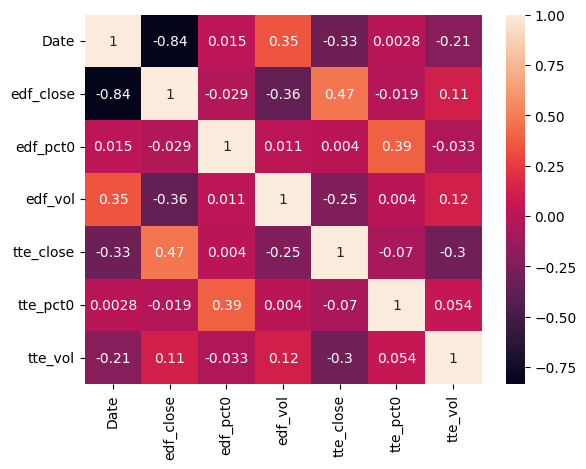

In [17]:
sns.heatmap(stocks.corr(), annot = True)

to-do:
1. get weather data (temperature, precipitation), see if theres strong correlation with electricity demand and prices
2. check correlation b/w demand and electricity prices and stock prices

ATTEMPTING TREND REMOVAL

In [18]:
from scipy.signal import detrend

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


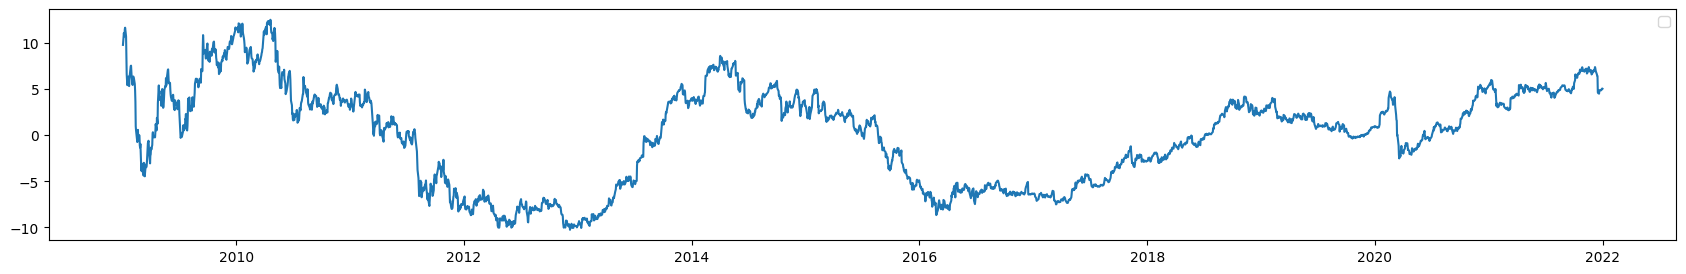

In [19]:
dt_edf = detrend(stocks.edf_close, type='linear')
dt_edf = pd.Series(dt_edf, index=stocks.index)
stocks['detrended_edf_close'] = dt_edf.round(2)
plt.figure(figsize=(21, 3))
plt.plot(stocks.Date, stocks.detrended_edf_close)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


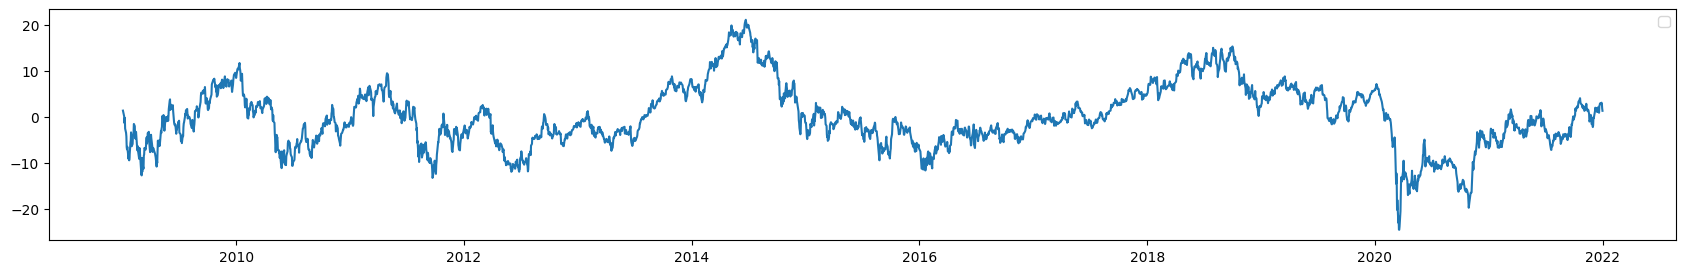

In [20]:
dt_tte = detrend(stocks.tte_close, type='linear')
dt_tte = pd.Series(dt_tte, index=stocks.index)
stocks['detrended_tte_close'] = dt_tte.round(2)
plt.figure(figsize=(21, 3))
plt.plot(stocks.Date, stocks.detrended_tte_close)
plt.legend()
plt.show()


In [21]:
stocks

,Date,edf_close,edf_pct0,edf_vol,tte_close,tte_pct0,tte_vol,detrended_edf_close,detrended_tte_close
0,2009-01-02,41.95,0.030513,748.45,57.560001,-0.017199,2133.9,9.77,1.39
1,2009-01-05,43.23,-0.009022,1280.00,56.570000,-0.005126,3016.0,11.06,0.40
2,2009-01-06,42.84,0.002568,971.01,56.279999,-0.025409,2879.1,10.68,0.12
3,2009-01-07,42.95,0.015600,990.35,54.849998,0.020419,2684.8,10.80,-1.31
4,2009-01-08,43.62,0.003210,1260.00,55.970001,-0.041629,3531.9,11.48,-0.19
...,...,...,...,...,...,...,...,...,...
3239,2021-12-27,9.76,0.008197,2510.00,51.009998,0.004117,1149.9,4.86,2.89
3240,2021-12-28,9.84,0.004065,2500.00,51.220001,-0.004881,1031.5,4.95,3.11
3241,2021-12-29,9.88,0.004049,2440.00,50.970001,-0.019619,1472.5,5.00,2.86
3242,2021-12-30,9.92,-0.004032,1610.00,49.970001,-0.010206,997.2,5.05,1.86


In [24]:
olympic_stocks = stocks[stocks.Date.dt.year == 2012]
nonolympic_stocks = stocks[(stocks.Date.dt.year == 2009) | (stocks.Date.dt.year == 2010) | (stocks.Date.dt.year == 2011) | (stocks.Date.dt.year == 2013) | (stocks.Date.dt.year == 2014) | (stocks.Date.dt.year == 2015)]
olympic_stocks.to_csv('./cleaned-datasets/olympic_year_stock_price.csv')
nonolympic_stocks.to_csv('./cleaned-datasets/nonolympic_year_stock_price.csv')
bp.to_csv('./cleaned-datasets/bp_stock.csv')